# Major Crime Analysis Over Time (2016 - 2022)

In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Store filepath into variable
mci_cleaned_csv = Path("../Output/MCI_main_cleaned_data.csv")

In [3]:
# Read in file
mci_cleaned_df = pd.read_csv(mci_cleaned_csv)
mci_cleaned_df = mci_cleaned_df.drop(columns = "Unnamed: 0")
mci_cleaned_df.head()

,Event Unique ID,Report Date,Occurence Date,Occurence Year,Occurence Month,Occurence Day,Occurence Day of Year,Occurence Day of Week,Premises Type,MCI Category,Hood ID,Neighbourhood,Longitude,Latitude
0,GO-20163930,2016-01-01,2016-01-01,2016,January,1,1,Friday,House,Assault,133,Centennial Scarborough,-79.144112,43.776319
1,GO-20164197,2016-01-01,2016-01-01,2016,January,1,1,Friday,Outside,Assault,159,Etobicoke City Centre,-79.546283,43.616413
2,GO-20162690,2016-01-01,2016-01-01,2016,January,1,1,Friday,House,Auto Theft,25,Glenfield-Jane Heights,-79.522923,43.751382
3,GO-2016418,2016-01-01,2016-01-01,2016,January,1,1,Friday,Outside,Assault,70,South Riverdale,-79.354948,43.641216
4,GO-2016452,2016-01-01,2016-01-01,2016,January,1,1,Friday,Apartment,Assault,108,Briar Hill-Belgravia,-79.451926,43.701471


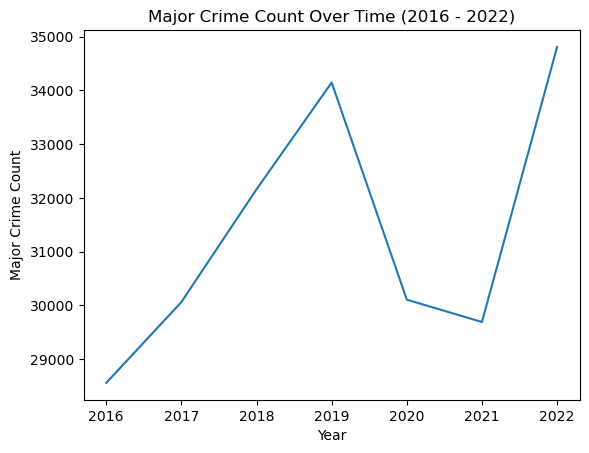

In [4]:
# Line plot to visualize MCI over time
mci_grouped_year = mci_cleaned_df.groupby("Occurence Year")["Event Unique ID"].count()
mci_grouped_year.plot(kind = "line")
plt.xlabel("Year")
plt.ylabel("Major Crime Count")
plt.title("Major Crime Count Over Time (2016 - 2022)")
plt.savefig("../Output/mci_count_year.png")
plt.show()


####  - Major crimes steadily increasing from 2016 up to 2019
####  - Significant drop in major crimes in 2020 then 2021
####  - Many factors could be considered, mainly due to the pandemic and lockdowns imposed by the governement
####  - With less COVID 19 restrictions in 2022, we can observe a significant increase in major crimes all of sudden

In [5]:
# Group by Year and Month and return the the count of crimes
mci_grouped_monthyear = mci_cleaned_df.groupby(["Occurence Year", "Occurence Month"])["Event Unique ID"].size()

# Convert the results to a Dataframe and reset index
mci_grouped_monthyear_df = mci_grouped_monthyear.to_frame().reset_index()

# Rename the column with the crime count
mci_grouped_monthyear_df = mci_grouped_monthyear_df.rename(columns = {"Event Unique ID": "Crime Count"})

# Create a new column Month Year
mci_grouped_monthyear_df["Occurence Month Year"] = mci_grouped_monthyear_df["Occurence Month"] + " " + mci_grouped_monthyear_df["Occurence Year"].map(str)

# Sort values by Year and Month
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
mci_grouped_monthyear_df["Occurence Month"] = pd.Categorical(mci_grouped_monthyear_df["Occurence Month"], categories = months, ordered=True)
mci_grouped_monthyear_df = mci_grouped_monthyear_df.sort_values(by = ["Occurence Year", "Occurence Month"], ascending = True)

mci_grouped_monthyear_df.head()

,Occurence Year,Occurence Month,Crime Count,Occurence Month Year
4,2016,January,2292,January 2016
3,2016,February,2170,February 2016
7,2016,March,2275,March 2016
0,2016,April,2322,April 2016
8,2016,May,2452,May 2016


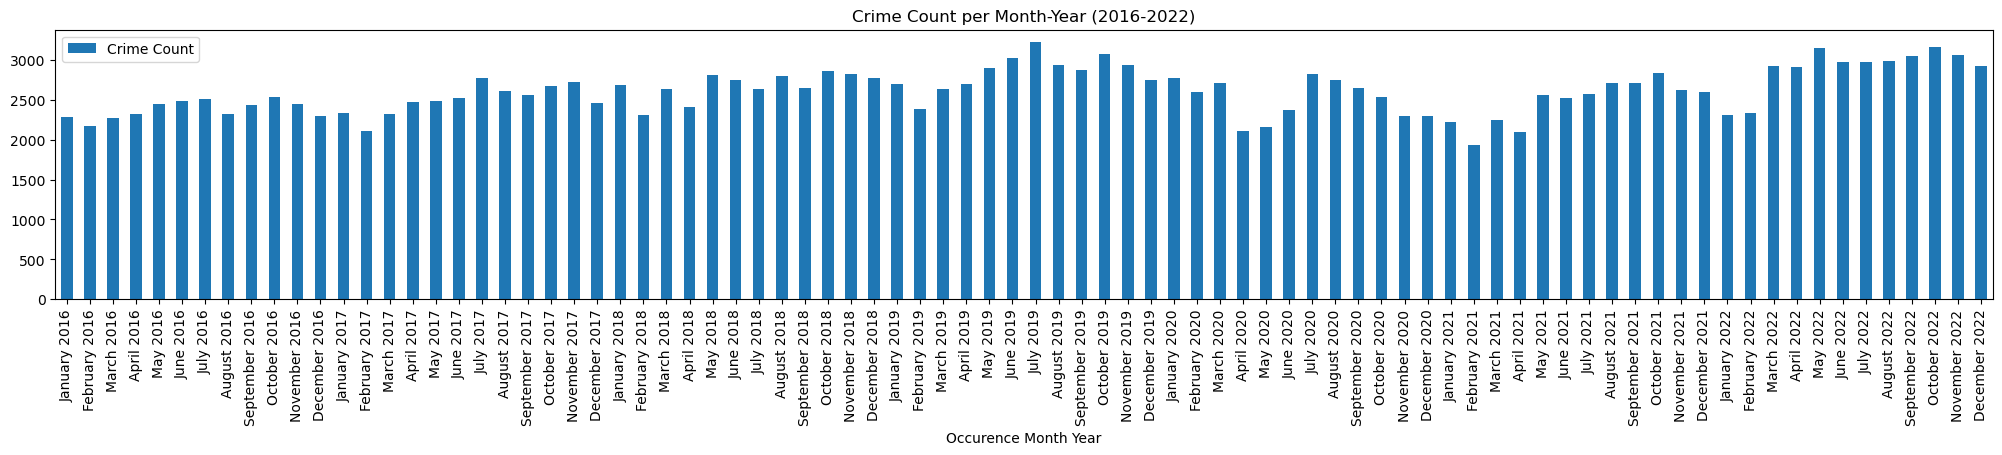

<Figure size 640x480 with 0 Axes>

In [6]:
# Bar chart to visualize MCI by month and year
# Filter the DataFrame down only to those columns to chart
cc_monthyear = mci_grouped_monthyear_df[["Occurence Month Year","Crime Count"]]

# Set the index to be "State" so they will be used as labels
cc_monthyear = cc_monthyear.set_index("Occurence Month Year")

# Use DataFrame.plot() in order to create a bar chart of the data
cc_monthyear.plot(kind="bar", figsize=(25,3.5))

# Set a title for the chart
plt.title("Crime Count per Month-Year (2016-2022)")
plt.savefig("../Output/mci_count_monthyear.png")
plt.show()
plt.tight_layout()

In [7]:
# Major Crimes Categories
mci = list(mci_cleaned_df["MCI Category"].unique())
mci

['Assault', 'Auto Theft', 'Robbery', 'Break and Enter', 'Theft Over']

In [8]:
# Group by crime category and Years and return the crime count
mci_grouped_year_cat = mci_cleaned_df.groupby(["MCI Category", "Occurence Year"]).size()
mci_grouped_year_cat_df = mci_grouped_year_cat.to_frame()
mci_grouped_year_cat_df = mci_grouped_year_cat_df.reset_index()
mci_grouped_year_cat_df = mci_grouped_year_cat_df.rename(columns = {0: "Crime Count"})

# Create a Dataframe showing the count of crime by crime category and year
assault_cc = list(mci_grouped_year_cat_df.loc[mci_grouped_year_cat_df["MCI Category"]=="Assault", "Crime Count"])
autotheft_cc = list(mci_grouped_year_cat_df.loc[mci_grouped_year_cat_df["MCI Category"]=="Auto Theft", "Crime Count"])
roberry_cc = list(mci_grouped_year_cat_df.loc[mci_grouped_year_cat_df["MCI Category"]=="Robbery", "Crime Count"])
breakandenter_cc = list(mci_grouped_year_cat_df.loc[mci_grouped_year_cat_df["MCI Category"]=="Break and Enter", "Crime Count"])
theftover_cc = list(mci_grouped_year_cat_df.loc[mci_grouped_year_cat_df["MCI Category"]=="Theft Over", "Crime Count"])

mci_count_by_cat = pd.DataFrame({"Assault": assault_cc,
                                  "Auto Theft": autotheft_cc,
                                  "Robbery": roberry_cc,
                                  "Break and Enter": breakandenter_cc,
                                  "Theft Over": theftover_cc}, index= [2016, 2017, 2018, 2019, 2020, 2021, 2022])

mci_count_by_cat

,Assault,Auto Theft,Robbery,Break and Enter,Theft Over
2016,15488,2991,2852,6235,993
2017,15877,3264,3036,6743,1142
2018,16390,4226,2859,7456,1229
2019,17146,4724,2687,8288,1301
2020,15093,5059,2066,6736,1154
2021,15703,5843,1678,5464,1004
2022,17164,8555,2071,5739,1280


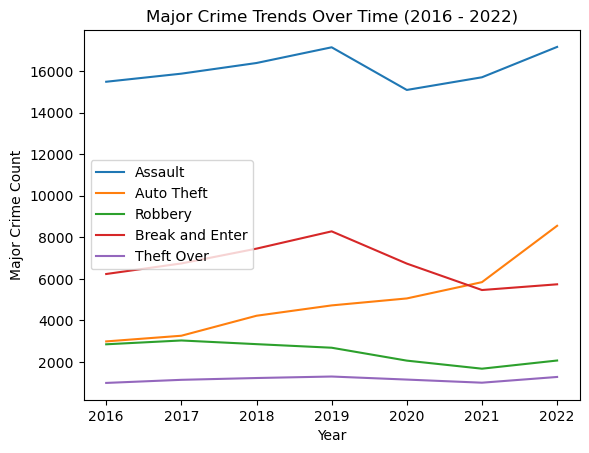

<Figure size 640x480 with 0 Axes>

In [9]:
# Use the dataframe to plot a line chart to visualize the break down of MCI by year
mci_count_by_cat.plot(kind = "line")
plt.xlabel("Year")
plt.ylabel("Major Crime Count")
plt.title("Major Crime Trends Over Time (2016 - 2022)")
plt.savefig("../Output/mci_count_year_cat.png")
plt.show()
plt.tight_layout()

####  - Assault remains at the top of the list of major crimes
####  - Auto Theft  kept increasing when the other crimes decreased

In [10]:
# print to new columns the total crime count and the percentage that represents each category in the total (Per year)
mci_count_by_cat["Total MCI"] = mci_count_by_cat.sum(axis=1)
mci_count_by_cat = mci_count_by_cat.join(mci_count_by_cat.iloc[:, :5].div(mci_count_by_cat["Total MCI"], axis=0).mul(100).round(2).add_prefix("% "))
mci_count_by_cat

,Assault,Auto Theft,Robbery,Break and Enter,Theft Over,Total MCI,% Assault,% Auto Theft,% Robbery,% Break and Enter,% Theft Over
2016,15488,2991,2852,6235,993,28559,54.23,10.47,9.99,21.83,3.48
2017,15877,3264,3036,6743,1142,30062,52.81,10.86,10.10,22.43,3.80
2018,16390,4226,2859,7456,1229,32160,50.96,13.14,8.89,23.18,3.82
2019,17146,4724,2687,8288,1301,34146,50.21,13.83,7.87,24.27,3.81
2020,15093,5059,2066,6736,1154,30108,50.13,16.80,6.86,22.37,3.83
2021,15703,5843,1678,5464,1004,29692,52.89,19.68,5.65,18.40,3.38
2022,17164,8555,2071,5739,1280,34809,49.31,24.58,5.95,16.49,3.68


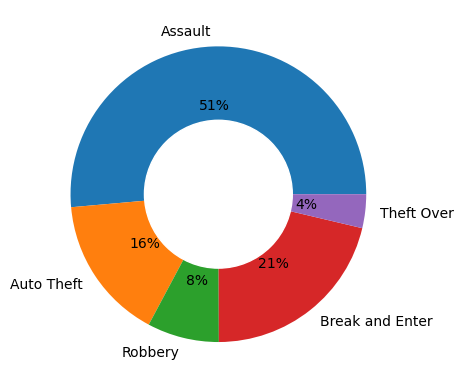

In [11]:
# Create pie/donut chart to visualize the breakdown of Major Carime Catorgories
mci_cat_avg = list(mci_count_by_cat[['Assault', 'Auto Theft', 'Robbery', 'Break and Enter', 'Theft Over']].mean().round())
fig, ax = plt.subplots()
my_circle=plt.Circle((0,0), 0.5, color="white")
ax.pie(mci_cat_avg, labels=mci, autopct="%1.f%%")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig("../Output/pie_pct_crime_cat.png")
plt.show()

In [12]:
# calculate the percentage of change over years for each category
mci_count_by_cat.iloc[:, 0:6].pct_change().mul(100).round(2).astype(str) + "%"

,Assault,Auto Theft,Robbery,Break and Enter,Theft Over,Total MCI
2016,nan%,nan%,nan%,nan%,nan%,nan%
2017,2.51%,9.13%,6.45%,8.15%,15.01%,5.26%
2018,3.23%,29.47%,-5.83%,10.57%,7.62%,6.98%
2019,4.61%,11.78%,-6.02%,11.16%,5.86%,6.18%
2020,-11.97%,7.09%,-23.11%,-18.73%,-11.3%,-11.83%
2021,4.04%,15.5%,-18.78%,-18.88%,-13.0%,-1.38%
2022,9.3%,46.41%,23.42%,5.03%,27.49%,17.23%


# Let's explore 2022 in depth

In [13]:
# Filter dataframe by 2022 
mci_2022_df = mci_cleaned_df[mci_cleaned_df["Occurence Year"]== 2022]
mci_2022_df = mci_2022_df.reset_index(drop=True)
mci_2022_df.head()

,Event Unique ID,Report Date,Occurence Date,Occurence Year,Occurence Month,Occurence Day,Occurence Day of Year,Occurence Day of Week,Premises Type,MCI Category,Hood ID,Neighbourhood,Longitude,Latitude
0,GO-20223706,2022-01-01,2022-01-01,2022,January,1,1,Saturday,Apartment,Assault,44,Flemingdon Park,-79.326407,43.718945
1,GO-20223965,2022-01-01,2022-01-01,2022,January,1,1,Saturday,House,Assault,172,Dovercourt Village,-79.426608,43.670589
2,GO-20225063,2022-01-01,2022-01-01,2022,January,1,1,Saturday,Apartment,Assault,100,Yonge-Eglinton,-79.400835,43.707754
3,GO-2022644,2022-01-01,2022-01-01,2022,January,1,1,Saturday,Commercial,Assault,21,Humber Summit,-79.549072,43.750643
4,GO-20224580,2022-01-01,2022-01-01,2022,January,1,1,Saturday,Outside,Assault,136,West Hill,-79.199826,43.760005


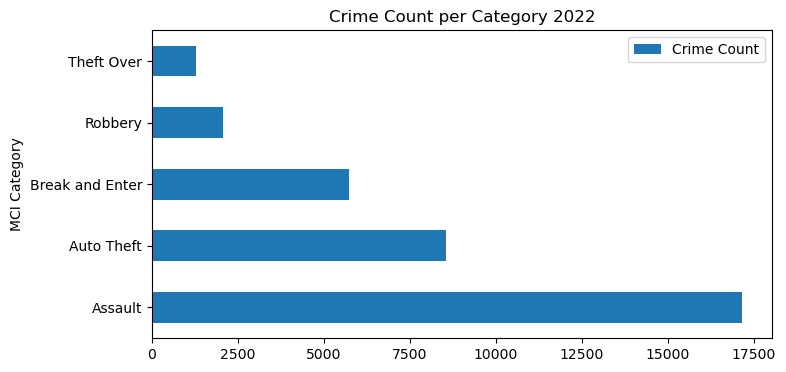

<Figure size 640x480 with 0 Axes>

In [14]:
# Major Crime Indicators in 2022
# Filter the DataFrame down only to those columns to chart
cc_cat = mci_2022_df.groupby(mci_2022_df["MCI Category"]).size()
cc_cat_df = cc_cat.to_frame()
cc_cat_df = cc_cat_df.rename(columns = {0: "Crime Count"})
cc_cat_df

# Create a bar chart of the data
cc_cat_df.plot(kind="barh", figsize=(8,4))

# Set a title for the chart
plt.title("Crime Count per Category 2022")
plt.savefig("../Output/mci_count_cat_2022.png")
plt.show()
plt.tight_layout()

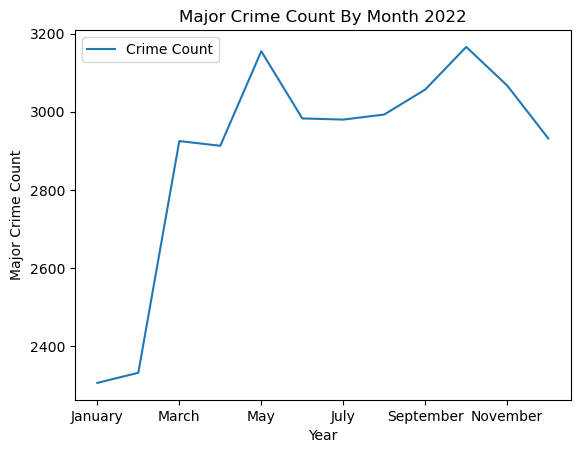

In [15]:
# MCI by month - 2022
# Filter the DataFrame down only to those columns to chart
cc_2022_month = mci_2022_df.groupby("Occurence Month")["Event Unique ID"].count()
cc_2022_month_df = cc_2022_month.to_frame().reset_index()
cc_2022_month_df = cc_2022_month_df.rename(columns = {"Event Unique ID" : "Crime Count"})
cc_2022_month_df["Occurence Month"] = pd.Categorical(cc_2022_month_df["Occurence Month"], categories = months, ordered=True)
cc_2022_month_df = cc_2022_month_df.sort_values(by = ["Occurence Month"], ascending = True)
cc_2022_month_df = cc_2022_month_df.set_index("Occurence Month")

# Create a bar chart of the data
cc_2022_month_df.plot(kind = "line")
plt.xlabel("Year")
plt.ylabel("Major Crime Count")
plt.title("Major Crime Count By Month 2022")
plt.savefig("../Output/mci_count_month_2022.png")
plt.show()

In [16]:
# Group by crime category and month and return the crime count
mci_grouped_month_cat = mci_2022_df.groupby(["MCI Category", "Occurence Month"]).size()
mci_grouped_month_cat_df = mci_grouped_month_cat.to_frame()
mci_grouped_month_cat_df = mci_grouped_month_cat_df.reset_index()
mci_grouped_month_cat_df = mci_grouped_month_cat_df.rename(columns = {0: "Crime Count"})
mci_grouped_month_cat_df["Occurence Month"] = pd.Categorical(mci_grouped_month_cat_df["Occurence Month"], categories = months, ordered=True)
mci_grouped_month_cat_df = mci_grouped_month_cat_df.sort_values(by = ["MCI Category", "Occurence Month"], ascending = True)
mci_grouped_month_cat_df

# Create a Dataframe showing the count of crime by crime category and month (2022)
assault_cc_month = list(mci_grouped_month_cat_df.loc[mci_grouped_month_cat_df["MCI Category"]=="Assault", "Crime Count"])
autotheft_cc_month = list(mci_grouped_month_cat_df.loc[mci_grouped_month_cat_df["MCI Category"]=="Auto Theft", "Crime Count"])
roberry_cc_month = list(mci_grouped_month_cat_df.loc[mci_grouped_month_cat_df["MCI Category"]=="Robbery", "Crime Count"])
breakandenter_cc_month = list(mci_grouped_month_cat_df.loc[mci_grouped_month_cat_df["MCI Category"]=="Break and Enter", "Crime Count"])
theftover_cc_month = list(mci_grouped_month_cat_df.loc[mci_grouped_month_cat_df["MCI Category"]=="Theft Over", "Crime Count"])

mci_count_by_cat_month = pd.DataFrame({"Assault": assault_cc_month,
                                  "Auto Theft": autotheft_cc_month,
                                  "Robbery": roberry_cc_month,
                                  "Break and Enter": breakandenter_cc_month,
                                  "Theft Over": theftover_cc_month}, 
                                    index= ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

mci_count_by_cat_month

,Assault,Auto Theft,Robbery,Break and Enter,Theft Over
January,1053,609,139,429,76
February,1156,556,125,401,94
March,1422,746,164,501,92
April,1434,675,206,492,106
May,1645,660,197,542,111
June,1548,698,162,454,121
July,1559,636,178,477,130
August,1527,686,187,478,115
September,1521,750,191,492,103
October,1534,853,186,477,116


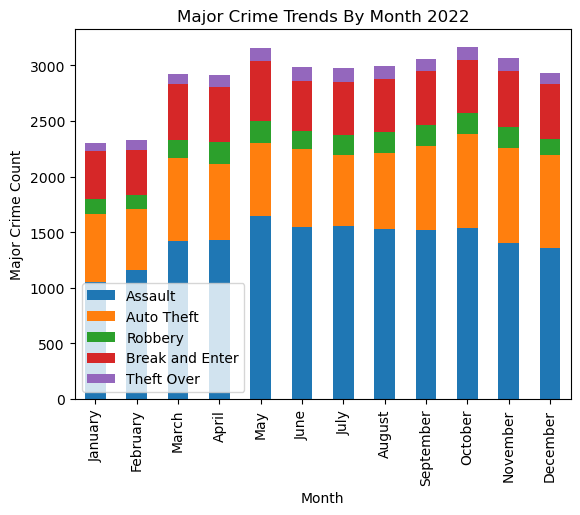

<Figure size 640x480 with 0 Axes>

In [17]:
# Use the dataframe to plot a stacked bar chart to visualize the break down of MCI count by month (2022)
mci_count_by_cat_month.plot(kind = "bar", stacked = True)
plt.xlabel("Month")
plt.ylabel("Major Crime Count")
plt.title("Major Crime Trends By Month 2022")
plt.savefig("../Output/mci_count_month_cat_2022.png")
plt.show()
plt.tight_layout()

In [18]:
# Group by Date, day of the week and MCI category and return the crime count
mci_dow = mci_2022_df.groupby(["Occurence Date", "Occurence Day of Week", "MCI Category"]).size()
mci_dow_df = mci_dow.to_frame()
mci_dow_df = mci_dow_df.reset_index()
mci_dow_df = mci_dow_df.rename(columns = {0: "Crime Count"})

#Create a summary statistics after grouping by day of week
sum_stats_dow = mci_dow_df.groupby(["Occurence Day of Week"]).agg({"Crime Count": ["mean", "median", "var", "std", "sem", "min", "max"]})
sum_stats_dow_df = sum_stats_dow.reset_index()
sum_stats_dow_df

Occurence Day of Week Crime Count                                          \
                               mean median         var        std       sem   
0            Friday       19.409266   16.0  268.227201  16.377643  1.017657   
1            Monday       19.324324   14.0  273.886654  16.549521  1.028337   
2            Saturday     19.260536   14.0  329.008783  18.138599  1.122751   
3            Sunday       18.783465   13.0  312.597196  17.680418  1.109368   
4            Thursday     19.925197   16.0  264.369876  16.259455  1.020209   
5            Tuesday      19.490347   16.0  266.545449  16.326220  1.014462   
6            Wednesday    18.730769   14.0  259.147312  16.098053  0.998359   

           
  min max  
0   1  72  
1   1  66  
2   1  85  
3   1  79  
4   1  66  
5   1  74  
6   1  92

In [19]:
# Group by Neighbourhood and month and return the crime count
mci_hood = mci_2022_df.groupby(["Neighbourhood", "Occurence Month"]).size()
mci_hood_df = mci_hood.to_frame()
mci_hood_df = mci_hood_df.reset_index()
mci_hood_df = mci_hood_df.rename(columns = {0: "Crime Count"})
mci_hood_df["Occurence Month"] = pd.Categorical(mci_hood_df["Occurence Month"], categories = months, ordered=True)
mci_hood_df = mci_hood_df.sort_values(by = ["Neighbourhood", "Occurence Month"], ascending = True)

#Create a summary statistics after grouping by Neighbourhood
sum_stats_hood = mci_hood_df.groupby("Neighbourhood").agg({"Crime Count": ["mean", "median", "var", "std", "sem", "min", "max"]})
sum_stats_hood_df = sum_stats_hood.reset_index()
sum_stats_hood_df.head(40)

Neighbourhood Crime Count                              \
                                             mean median        var       std   
0                     Agincourt North   11.916667   11.5  10.992424  3.315483   
1        Agincourt South-Malvern West   24.666667   23.5  27.515152  5.245489   
2                           Alderwood   12.333333   13.5  18.060606  4.249777   
3                               Annex   46.250000   45.0  41.477273  6.440285   
4                            Avondale    5.916667    6.0   7.901515  2.810963   
5                   Banbury-Don Mills   17.666667   17.5  38.606061  6.213378   
6                      Bathurst Manor   12.833333   13.0  12.151515  3.485902   
7                      Bay-Cloverhill   14.000000   14.0   3.454545  1.858641   
8                     Bayview Village   15.666667   16.0  40.787879  6.386539   
9               Bayview Woods-Steeles    5.083333    6.0   6.083333  2.466441   
10               Bedford Park-Nortown   22.250000   22.0  22.204545  4.712170   
11            Beechborough-Greenbrook    7.666667    6.0  11.515152  3.393398   
12                      Bendale South    5.916667    6.0   4.083333  2.020726   
13                Bendale-Glen Andrew   23.083333   24.5  31.356061  5.599648   
14              Birchcliffe-Cliffside   18.250000   18.5  28.750000  5.361903   
15                        Black Creek   25.666667   24.0  72.424242  8.510243   
16                        Blake-Jones    7.583333    7.0  10.810606  3.287949   
17               Briar Hill-Belgravia   13.916667   12.0  38.628788  6.215206   
18  Bridle Path-Sunnybrook-York Mills   11.416667   10.5  15.537879  3.941812   
19                    Broadview North    7.000000    7.5   7.454545  2.730301   
20                Brookhaven-Amesbury   18.500000   19.0  43.181818  6.571287   
21    Cabbagetown-South St.James Town   18.416667   18.0  12.446970  3.528026   
22                 Caledonia-Fairbank    7.166667    7.0  11.969697  3.459725   
23                          Casa Loma    9.250000    8.5  13.113636  3.621276   
24             Centennial Scarborough    6.583333    7.0   2.628788  1.621354   
25                   Church-Wellesley   37.583333   40.0  33.356061  5.775471   
26                Clairlea-Birchmount   29.833333   28.5  73.969697  8.600564   
27                       Clanton Park   22.916667   24.5  28.083333  5.299371   
28                         Cliffcrest   14.083333   13.5  44.628788  6.680478   
29             Corso Italia-Davenport   12.500000   12.0  16.272727  4.033947   
30                           Danforth   15.750000   16.0  16.750000  4.092676   
31                 Danforth East York   10.750000   10.5   8.386364  2.895922   
32                 Don Valley Village   17.333333   16.5  11.878788  3.446562   
33                        Dorset Park   26.916667   28.5  39.537879  6.287915   
34                 Dovercourt Village   12.583333   12.5  18.265152  4.273775   
35                          Downsview   23.583333   21.5  42.265152  6.501165   
36                Downtown Yonge East   56.833333   57.5  85.606061  9.252354   
37                     Dufferin Grove   11.166667   11.5  11.969697  3.459725   
38                  East End-Danforth   26.500000   26.0  37.727273  6.142253   
39                    East L'Amoreaux   12.250000   13.5  29.113636  5.395705   

                      
         sem min max  
0   0.957097   8  18  
1   1.514242  17  33  
2   1.226805   4  19  
3   1.859150  38  56  
4   0.811455   2  11  
5   1.793648   8  32  
6   1.006293   7  20  
7   0.536543  11  18  
8   1.843635   8  30  
9   0.712000   1   9  
10  1.360286  17  31  
11  0.979590   3  14  
12  0.583333   2  10  
13  1.616479  15  34  
14  1.547848  10  30  
15  2.456696  13  41  
16  0.949149   3  14  
17  1.794175   5  25  
18  1.137903   6  18  
19  0.788170   3  11  
20  1.896967   8  29  
21  1.018453  14  25  
22  0.998737   2  13  
23  1.045372   4  17  
24  0.468045   4   9  


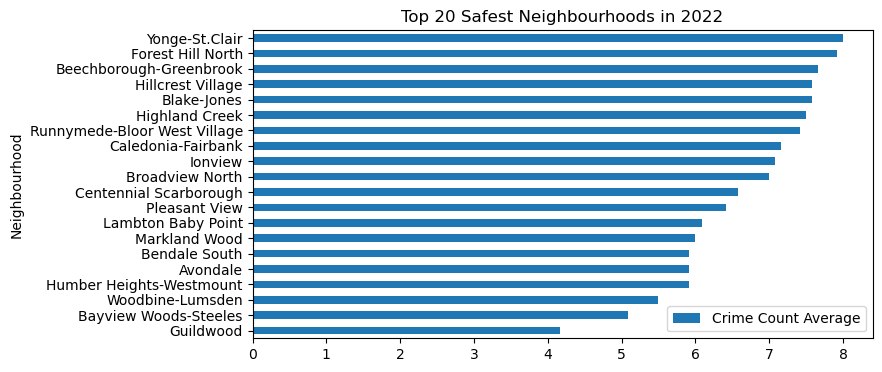

<Figure size 640x480 with 0 Axes>

In [20]:
# Create a dataframe with two columns Neighbourhood and Crime count Average
neighbourhoods = sum_stats_hood_df["Neighbourhood"]
avg_crime_count = sum_stats_hood_df["Crime Count"]["mean"]
avg_cc_hood_df = pd.DataFrame({"Neighbourhood": neighbourhoods, "Crime Count Average": avg_crime_count})

# Sort the data (ascending) by Crime Count Average to determine the top 20 safest neighbourhoods
avg_cc_hood_safe_df = avg_cc_hood_df.sort_values(by = ["Crime Count Average"], ascending = True)
avg_cc_safe_hood = avg_cc_hood_safe_df.head(20).set_index("Neighbourhood")
avg_cc_safe_hood

# Create a horizontal bar chart of the data
avg_cc_safe_hood.plot(kind="barh", figsize=(8,4))

# Set a title for the chart
plt.title("Top 20 Safest Neighbourhoods in 2022")
plt.savefig("../Output/safest_hood_2022.png")
plt.show()
plt.tight_layout()

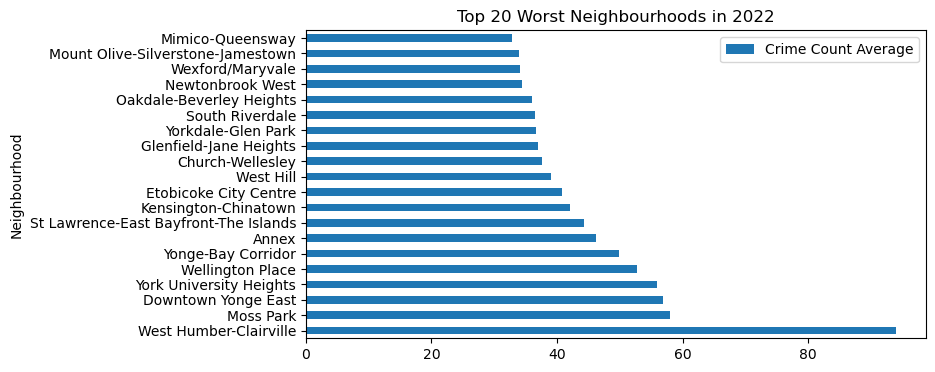

<Figure size 640x480 with 0 Axes>

In [21]:
# Sort the data (descending) by Crime Count Average to determine the top 20 safest neighbourhoods
avg_cc_hood_worst_df = avg_cc_hood_df.sort_values(by = ["Crime Count Average"], ascending = False)
avg_cc_worst_hood = avg_cc_hood_worst_df.head(20).set_index("Neighbourhood")
avg_cc_worst_hood

# Create a horizontal bar chart of the data
avg_cc_worst_hood.plot(kind="barh", figsize=(8,4))

# Set a title for the chart
plt.title("Top 20 Worst Neighbourhoods in 2022")
plt.savefig("../Output/worst_hood_2022.png")
plt.show()
plt.tight_layout()